<a href="https://colab.research.google.com/github/statenandrea33/Staten_GEOG312_FinalExam/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Python Programming

1. Data Manipulation:  Write a Python function that takes a list of lists representing points (latitude, longitude) and returns the average latitude and average longitude.

In [1]:
points = [
    [34.0522, -118.2437],
    [40.7128, -74.0060],
    [41.8781, -87.6298],
    [37.7749, -122.4194],
    [29.7604, -95.3698]
]

In [2]:
def average_coordinates(points):
    total_lat = sum(point[0] for point in points)
    total_lon = sum(point[1] for point in points)
    avg_lat = total_lat / len(points)
    avg_lon = total_lon / len(points)
    return avg_lat, avg_lon

average_lat, average_lon = average_coordinates(points)

print(f"Average Latitude: {average_lat}, Average Longitude: {average_lon}")

Average Latitude: 36.83568, Average Longitude: -99.53374


2. Conditional Statements: Write a Python program that reads a CSV file containing elevation data for points. The program should then identify and print the points with an elevation above a user-specified threshold.

In [37]:
url2 = 'https://github.com/statenandrea33/Staten_GEOG312_Lab9/blob/main/Riparian_vegetation_status_trends_elevation_great_basin_streams.csv'
leafmap.download_file(url2)

Downloading...
From: https://raw.githubusercontent.com/statenandrea33/Staten_GEOG312_Lab9/main/Riparian_vegetation_status_trends_elevation_great_basin_streams.csv
To: /content/Riparian_vegetation_status_trends_elevation_great_basin_streams.csv
8.21MB [00:00, 53.5MB/s]


'/content/Riparian_vegetation_status_trends_elevation_great_basin_streams.csv'

In [46]:
import csv

def filter_elevation(csv_file, threshold):
    try:
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)

            header = next(reader)

            elevation_index = header.index('Elevation_meters') if 'Elevation_meters' in header else -1

            if elevation_index == -1:
                print("Error: 'elevation' column not found in the CSV file.")
                return

            for row in reader:
                try:
                    elevation = float(row[elevation_index])
                    if elevation > threshold:
                        print(f"Point at ({row[0]}, {row[1]}) has elevation: {elevation}")
                except ValueError:
                    print(f"Error: Invalid elevation value in row {reader.line_num}.")

    except FileNotFoundError:
        print(f"Error: File not found at path: {csv_file}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

csv_file_path = '/content/Riparian_vegetation_status_trends_elevation_great_basin_streams.csv'
user_threshold = float(input("Enter the elevation threshold: "))
filter_elevation(csv_file_path, user_threshold)


Enter the elevation threshold: 3000
Point at (MULTIPOLYGON (((297739.181900001 4255197.7807,297744.4859 4255168.7487,297733.2464 4255165.7397,297725.937 4255165.1952,297721.474399999 4255165.5195,297712.702400001 4255167.2589,297707.626 4255168.79,297704.071100001 4255169.8623,297645.084500001 4255190.3709,297644.873400001 4255190.4612,297653.411799999 4255221.4757,297658.3396 4255219.4062,297674.8865 4255208.8315,297679.466400001 4255206.3334,297690.375 4255202.2664,297702.132000001 4255199.6145,297720.5285 4255197.4943,297733.1368 4255197.3542,297739.181900001 4255197.7807))), 4902) has elevation: 3210.75
Point at (MULTIPOLYGON (((297902.5962 4255224.7463,297889.628300001 4255218.236,297872.9311 4255210.7461,297860.955900001 4255206.2071,297839.3496 4255199.4058,297832.613499999 4255197.4561,297829.2821 4255207.6421,297838.5009 4255210.6847,297855.823699999 4255215.6277,297867.7283 4255220.1862,297880.4579 4255227.1353,297896.0 4255239.1902,297902.5962 4255224.7463))), 4907) has elev

3. Loops: Write a Python program that iterates through a dictionary containing county names and their corresponding population densities. The program should calculate and print the total population for all counties. (Hint: Use a random number generator or google the population of your chosen cities to create
the values for the population density. Use 10 different city names.)

In [4]:
county_populations = {
    'Los Angeles': 10014009,
    'Cook': 5275541,
    'Harris': 4731145,
    'Maricopa': 4420568,
    'San Diego': 3298634,
    'Orange': 3186989,
    'Miami-Dade': 2701767,
    'Dallas': 2613539,
    'Kings': 2736074,
    'Riverside': 2418185
}

def calculate_total_population(county_populations):
    total_population = sum(county_populations.values())
    return total_population

total_population = calculate_total_population(county_populations)
print(f'Total population for all counties: {total_population}')


Total population for all counties: 41396451


4. Functions with Arguements: Write a Python function that takes a shapefile path as input and returns its area in square kilometers.

In [5]:
!pip install leafmap

In [6]:
import leafmap
url ='https://github.com/statenandrea33/Staten_GEOG312_FinalProject/blob/main/tl_2023_us_state.zip'
leafmap.download_file(url, unzip=True)

Downloading...
From: https://raw.githubusercontent.com/statenandrea33/Staten_GEOG312_FinalProject/main/tl_2023_us_state.zip
To: /content/tl_2023_us_state.zip
100%|██████████| 9.95M/9.95M [00:00<00:00, 46.4MB/s]


Extracting files...


'/content/tl_2023_us_state.zip'

In [7]:
import geopandas as gpd

shapefile_path = '/content/tl_2023_us_state.shp'
gdf = gpd.read_file(shapefile_path)

print(f"Shapefile CRS: {gdf.crs}")


Shapefile CRS: EPSG:4269


In [8]:
target_crs = 'EPSG:3395'
gdf_1 = gdf.to_crs(target_crs)

total_area = gdf_1.geometry.area.sum() / 1e6
print(f'Total area of the reprojected shapefile: {total_area:.2f} square kilometers')


Total area of the reprojected shapefile: 22811284.93 square kilometers


5. Error Handling:Write a Python program that attempts to read a raster file. If the file is not found or invalid, the program should print a helpful error message and gracefully exit.

In [32]:
url1 = 'https://github.com/opengeos/data/blob/main/elevation/dtm.tif'
leafmap.download_file(url1)

Downloading...
From: https://raw.githubusercontent.com/opengeos/data/main/elevation/dtm.tif
To: /content/dtm.tif
100%|██████████| 214k/214k [00:00<00:00, 2.12MB/s]


'/content/dtm.tif'

In [33]:
import rasterio
from rasterio.errors import RasterioError

def read_raster_file(file_path):
    try:

        with rasterio.open(file_path) as src:

            print("Raster file successfully opened.")

    except FileNotFoundError:

        print(f"Error: File not found at path: {file_path}")
    except RasterioError:

        print(f"Error: Invalid raster file at path: {file_path}")
    except Exception as e:

        print(f"An unexpected error occurred: {e}")
    else:

        print("Raster file processing completed successfully.")
    finally:

        print("Program execution complete.")

file_path = '/content/dtm.tif'
read_raster_file(file_path)


Raster file successfully opened.
Raster file processing completed successfully.
Program execution complete.


In [34]:
import rasterio
from rasterio.errors import RasterioError

def read_raster_file(file_path):
    try:

        with rasterio.open(file_path) as src:

            print("Raster file successfully opened.")
    except FileNotFoundError:

        print(f"Error: File not found at path: {file_path}")
    except RasterioError:

        print(f"Error: Invalid raster file at path: {file_path}")
    except Exception as e:

        print(f"An unexpected error occurred: {e}")
    else:

        print("Raster file processing completed successfully.")
    finally:

        print("Program execution complete.")

file_path = '/content/dlm.tif'
read_raster_file(file_path)

An unexpected error occurred: /content/dlm.tif: No such file or directory
Program execution complete.


## Part 2: GIS Workflows For this section you are not explicitly writing a python program, but you are thinking through the problems and discussing the code that you would use to solve the problem.

1. Problem-Solving: You are tasked with creating a program to identify areas suitable for building a new solar farm. You have access to datasets for land cover, slope, and solar radiation. Describe the workflow of your program, including data preparation, analysis steps, and final output.

To create a program to identify areas that are suitable for building a new solar farm, the first step will be data preparation. This would be loading the datasets for land cover, slope, and solar radiation. The next step would be to merge the datasets to creat a comprehensive input for the analysis step. This analysis would involve overlaying the dataset, assignemnts weights to each factor, and create a sutiability index.

2. Critical Thinking: You are given a shapefile of earthquake epicenters and a raster file of population density. Explain how you would use Python and GIS libraries to identify the areas most vulnerable to earthquake damage, considering both population density and proximity to epicenters.

To identify earthquake-vulnerable areas, Python and GIS tools are useful. The workflow would begin with loading the earthquake epicenters and population density datasets into a map class for visualization. This would be followed up by spatial analysis, which would include buffer creation around epicenters. The previous process would allow us to identify areas that are at risk.

3. Critical Thinking: You are tasked with creating a visualization that shows the impacts of climate change on Tennessee agricultural production. You are given a dataset for precipitation, temperature, and crop output. How would you go about visualizing this in python and what analyses would need to be done to measure these impacts?

I would start by creating a map class and visualizing the data via a split map because this would allow us to visualize the change overtime. I would then perform a zonal statistics to calculate the percentage of change in these datasets over time.

4. Geospatial Analysis:You have a shapefile of national parks and a raster file of deforestation rates. Design a Python program to calculate the total area of deforestation within each national park and identify the park with the highest deforestation rate.

As I mentioned in the previous problem, I would use zonal statistics within geemaps functionality. This would allow me to calculate the total area that has experienced deforestation. I could then upload this information into a table and produce visual results to identify the park with the highest rate.

## Part 3: Mapping with Python

1. Shapefile Visualization: Write a Python program to read a shapefile. Create a map showing the data points as colored polygons (anything other than circles). Each data point should be colored based on its magnitude (e.g., green for small (low), yellow for medium (average), red for large (high)).

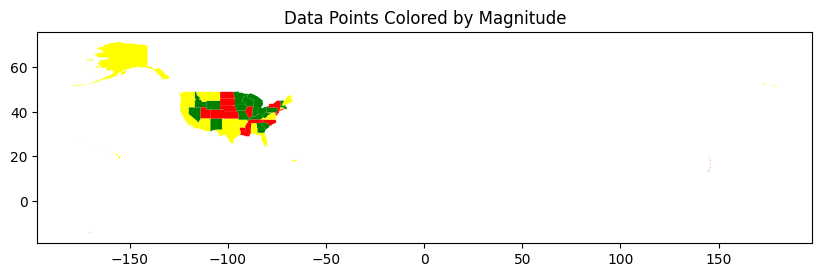

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def assign_color(ALAND):
    if ALAND < 150000000:
        return 'green'
    elif  150000000 <= ALAND < 80000000000:
        return 'yellow'
    else:
        return 'red'

shapefile_path = '/content/tl_2023_us_state.shp'

gdf = gpd.read_file(shapefile_path)

gdf['color'] = gdf['ALAND'].apply(assign_color)

colors = ['green', 'yellow', 'red']
cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['color'], legend=True, cmap=cmap)

plt.title('Data Points Colored by Magnitude')
plt.show()


2. Raster Processing and Visualization: Write a Python program to read a raster file of precipitation data and apply a colormap to visualize the temperature variations. Add a legend to the map and ensure clear labels for axes and title *Hint: Use the precipitation dataset already provided to you.

In [23]:
import ee
import geemap
geemap.ee_initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=F0jSZQDCbTKvPgaDufqKScRyelv_6STtZXZViuEMqjg&tc=R1wtBavSZ-M5NllBUntTs2voX9KK8t05OMuFFddjop4&cc=8GJxzqe1012FYIPlBlG_2YwG1Di9H-kEKgKGXzX43PY

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXllopAaWx61NTblgoP0qfqaOgNirfNutnIuXS4D0wKC9vj8_I-dkKw

Successfully saved authorization token.


In [29]:
map = geemap.Map()
states = ee.FeatureCollection('TIGER/2018/States')


collection = (
    ee.ImageCollection("NASA/ORNL/DAYMET_V4")
    .filterDate('2018-08-02', '2018-08-03')
    .select('tmax')
)

image = collection.median().clipToCollection(states)

vis = {
    'min': -40.0,
    'max': 30.0,
    'palette': ['1621a2', 'ffffff', '03ffff', '13ff03', 'efff00', 'ffb103', 'ff2300'],
}

map.centerObject(states)
map.addLayer(image, vis, 'Precipitation')
map.add_colorbar(vis, label="Precipitation Temp (C)", layer_name="RateBar")
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Bonus Question: Develop a Python program that automates a repetitive GIS task you encountered during your project or coursework. Explain the task, your approach, and the benefits of automation.

In [22]:
import os
import geopandas as gpd

def shapefiles_to_geojson(input_directory, output_directory):
    shapefiles = [file for file in os.listdir(input_directory) if file.endswith('.shp')]


    if not shapefiles:
        print("No shapefiles found in the specified directory.")
        return


    for shapefile in shapefiles:
        input_shapefile_path = os.path.join(input_directory, shapefile)


        output_geojson_path = os.path.join(output_directory, f"{os.path.splitext(shapefile)[0]}.geojson")


        gdf = gpd.read_file(input_shapefile_path)

        if gdf.crs is None:

            gdf = gdf.set_crs("EPSG:4326")

        geojson_data = gdf.to_json()


        with open(output_geojson_path, 'w') as geojson_file:
            geojson_file.write(geojson_data)

        print(f"Conversion completed for {shapefile}. GeoJSON file saved to {output_geojson_path}")


input_directory = '/content/Shapefiles'
output_directory = '/content/GeoJSON'
shapefiles_to_geojson(input_directory, output_directory)


Conversion completed for tl_2023_us_state.shp. GeoJSON file saved to /content/GeoJSON/tl_2023_us_state.geojson
Conversion completed for States_shapefile.shp. GeoJSON file saved to /content/GeoJSON/States_shapefile.geojson
Conversion completed for points.shp. GeoJSON file saved to /content/GeoJSON/points.geojson
